# RDkit usage with SMILES format

In [10]:
#This is to initialise the libraries
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

### Draw the Structures from SMILES strings

In [11]:
#SMILES Format
#Download SMILES from PubChem and Draw the structure
mol = Chem.MolFromSmiles('CCCCCC')
mol1 = Chem.MolFromSmiles('CCCCC(=O)')
ala = Chem.MolFromSmiles('CC(C(=O)O)N')
tyr = Chem.MolFromSmiles('C1=CC(=CC=C1CC(C(=O)O)N)O')
phy = Chem.MolFromSmiles('C1=CC=C(C=C1)CC(C(=O)O)N')
cep = Chem.MolFromSmiles('CC(=O)OCC1=C(N2C(C(C2=O)NC(=O)CC3=CC=CS3)SC1)C(=O)[O-].[Na+]')
avi = Chem.MolFromSmiles('C1CC(N2CC1N(C2=O)OS(=O)(=O)[O-])C(=O)N')

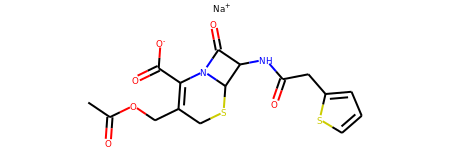

In [12]:
cep

### From Structures generating the SMILES strings

In [14]:
#Writing molecules in SMILES format
molx=ala
Chem.MolToSmiles(molx)
Chem.MolToSmiles(molx,isomericSmiles=False)

'CC(N)C(=O)O'

## Converting Structure into 3D-Coordinate SDF Format

In [15]:
#Converting molecules to SDF 3D-Coordinate format
moly=avi
print(Chem.MolToMolBlock(moly))


     RDKit          

 17 18  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0

### Adding Hydrogens in the 3D structure and Creating 3-D Coordinate structure

In [16]:
#fist add hydrogens before 3D coordinates
molz=Chem.AddHs(avi)

In [12]:
#Creating the 3D structure in SDF format for the moleucule with hydrogens
AllChem.EmbedMolecule(molz)
print(AllChem.MolToMolBlock(molz))


     RDKit          3D

 27 28  0  0  0  0  0  0  0  0999 V2000
    0.1193   -1.6903   -0.5826 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4796   -1.2936   -0.1917 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6506   -0.1955    0.7970 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3492    0.4875    0.8275 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6866   -0.3763    1.4047 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0537   -1.0787    0.1002 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4349    0.1204   -0.6574 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3361    0.9927   -0.3342 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1277    1.8500   -1.1442 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4789    0.3361   -1.4673 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6681    1.2076   -0.6417 S   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0233    2.5188   -0.2595 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.8330    1.4901   -1.5304 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.2219    0.3684    0

### Write the 3-D Coordinate of Structure into a .SDF file

In [18]:
#Writing Set of Molecules. It will write down the sdf file
w = Chem.SDWriter('alanine.sdf')
w.write(molz)

#We can visualise the molecule using some visualising software.

## Working with 2-D Structures and Generating 2-D images

In [19]:
#Working with 2D molecules
AllChem.Compute2DCoords(ala)
AllChem.Compute2DCoords(tyr)
AllChem.Compute2DCoords(phy)


0

### Saving the 2-D images in .PNG format

In [24]:
#Aligning molecules with common template
AllChem.GenerateDepictionMatching2DStructure(tyr,phy)
Draw.MolToFile(tyr,'tyrosine.png' )
Draw.MolToFile(phy,'phenylalanine.png' )

### Download Molecules database in .SDF/.SMI format from ZINC/PubChem 

In [25]:
#Download a database of .SMI or .SDF file and .smi file from ZINC database
multiple_sdf = Chem.SDMolSupplier('substances.sdf')
ms = [x for x in multiple_sdf if x is not None]
for m in ms: tmp=AllChem.Compute2DCoords(m)
     
#To save the individual molecules 
Draw.MolToFile(ms[0], 'cdk1.png')
Draw.MolToFile(ms[1], 'cdk2.png')

### Visualising structures in 2-D taken from database

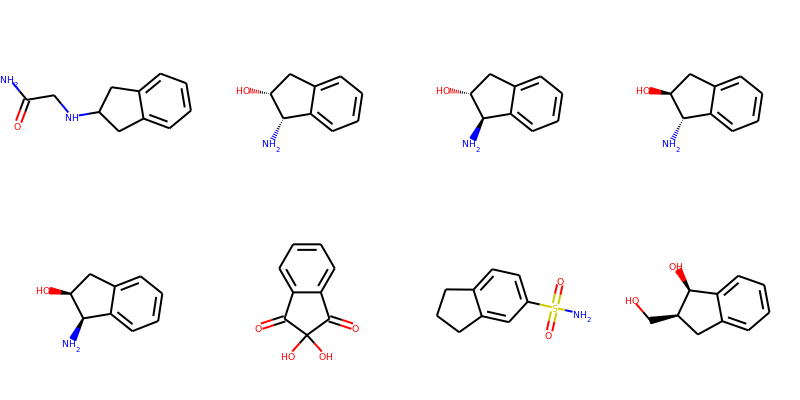

In [26]:
#We Can represent the molecules in a grid image.
img=Draw.MolsToGridImage(ms[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in ms[:8]])
img
#img.save('grid.png')

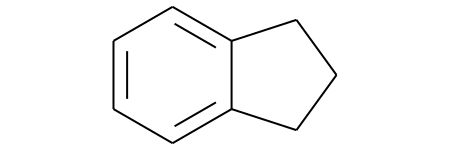

In [17]:
#Fragment for Substructure searching
Chem.MolFromSmiles('c2ccc1CCCc1c2')

### Aligning Dabase structures via a Substructure search

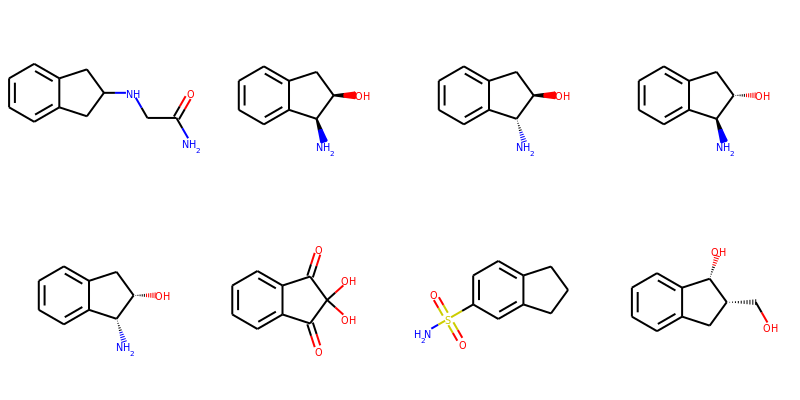

In [27]:
#Aligning the molecules in 2D with particular fragment
p= Chem.MolFromSmiles('c2ccc1CCCc1c2')
subms = [x for x in ms if x.HasSubstructMatch(p)]
len(subms)

#Saving the molecules with the orientation in an image.
AllChem.Compute2DCoords(p)
for m in subms: AllChem.GenerateDepictionMatching2DStructure(m,p)
img=Draw.MolsToGridImage(subms[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in subms[:8]])
img
#img.save('grid.aligned.png')